In [1]:
import h5py
import numpy as np

def read_mnc(filename):
    keys = ['step', 'start', 'length']
    with h5py.File(filename, 'r') as f:
        images = f['minc-2.0/image/0/image']
        spaces = [
            f['minc-2.0/dimensions/xspace'],
            f['minc-2.0/dimensions/yspace'],
            f['minc-2.0/dimensions/zspace']
        ]
        return np.array(images, np.float64), [{k: s.attrs[k] for k in keys} for s in spaces]

In [7]:
import skimage
import skimage.color
import matplotlib.cm as cm
import matplotlib.pyplot as plt

mr_images, mr_spaces = read_mnc('data/01_mr.mnc')
us_images, us_spaces = read_mnc('data/01_us.mnc')

us_spaces, mr_spaces

([{'length': 394, 'start': -98.0, 'step': 0.5},
  {'length': 466, 'start': -134.0, 'step': 0.5},
  {'length': 378, 'start': -72.0, 'step': 0.5}],
 [{'length': 394, 'start': -98.0, 'step': 0.5},
  {'length': 466, 'start': -134.0, 'step': 0.5},
  {'length': 378, 'start': -72.0, 'step': 0.5}])

In [94]:
def scale(image):
    image -= np.min(image)
    image /= np.max(image)
    return image

def show(mr_image, us_image):
    mr_rgb = skimage.color.gray2rgb(scale(mr_image))
    mr_hsv = skimage.color.rgb2hsv(mr_rgb)
    
    zeros = np.zeros((np.shape(us_image)[0],np.shape(us_image)[1]))
    
    us_gry = scale(us_image)
    us_rgb = np.dstack([us_gry, zeros, zeros])
    
    plt.imshow(mr_rgb + us_rgb)
    plt.show()

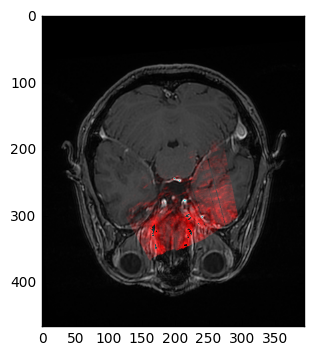

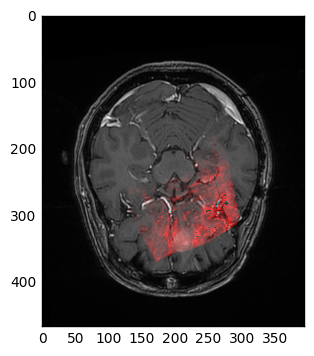

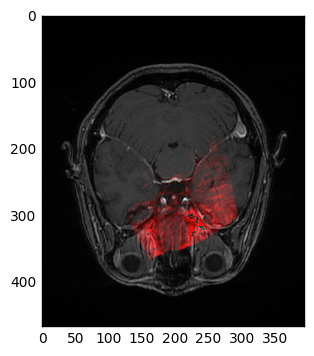

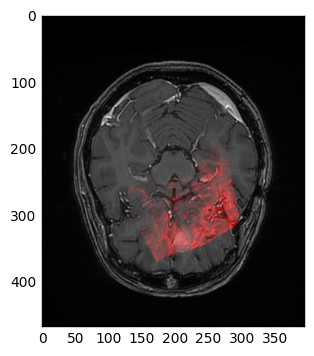

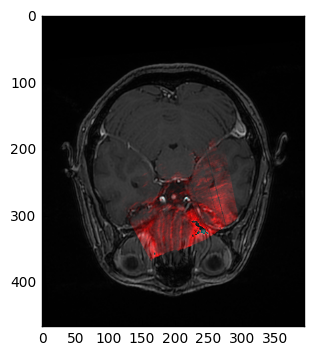

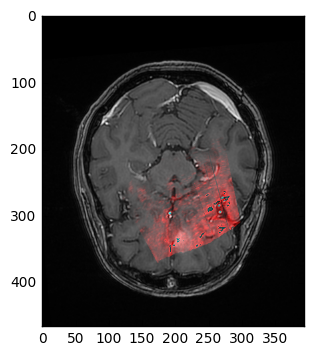

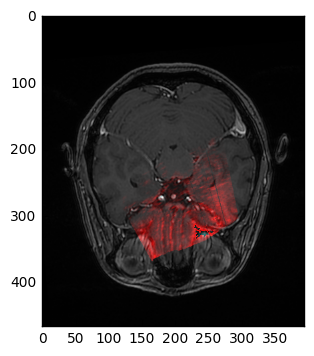

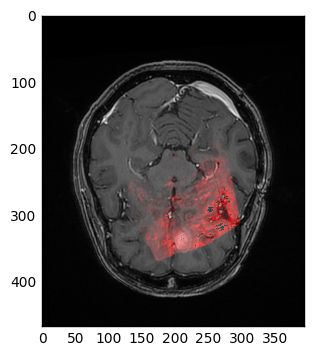

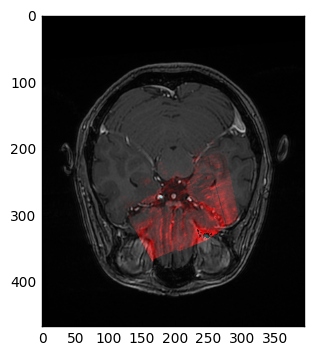

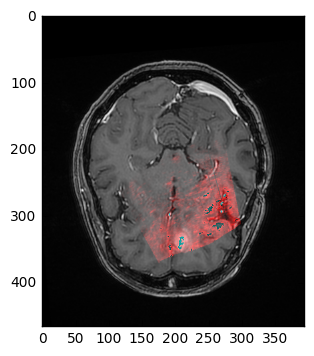

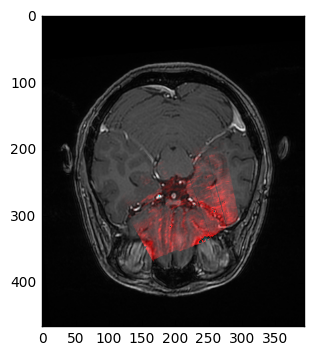

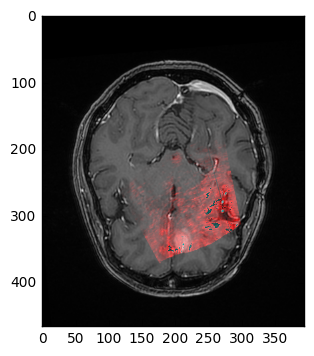

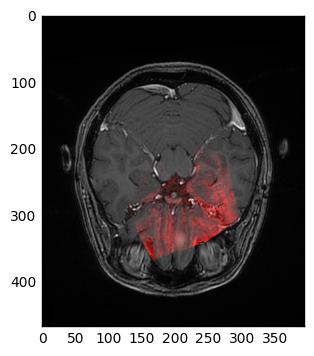

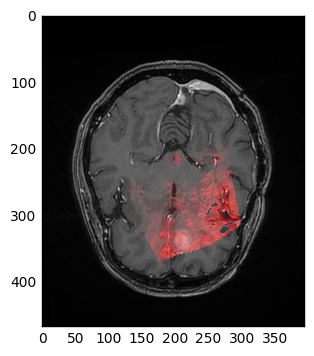

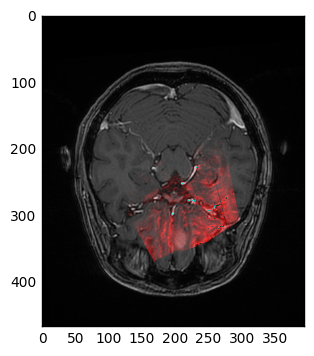

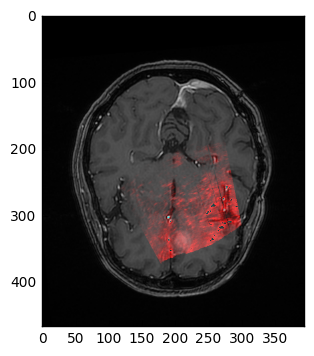

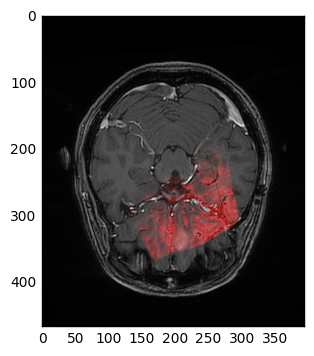

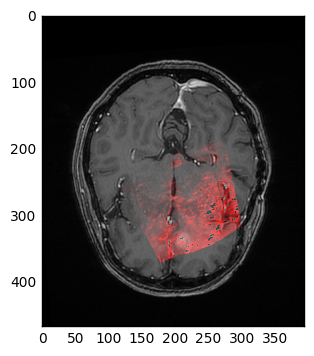

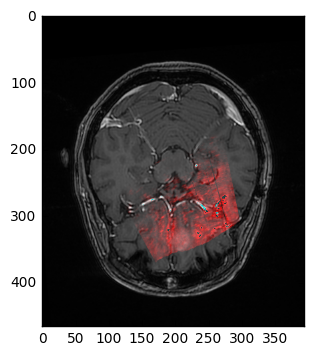

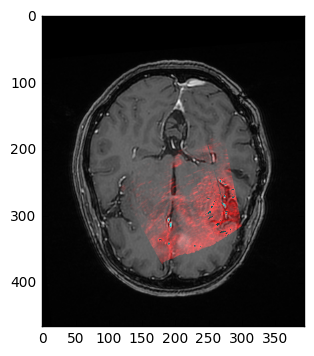

In [97]:
for i in range(10):
    for j in range(2):
        show(mr_images[100+j*20+2*i], us_images[100+j*20+2*i])